# SLEEP STAGE RECOGNITION

## Tổng hợp file

In [2]:
import os

path = '/content/drive/MyDrive/data/SleepStage'
files = os.listdir(path)

sleepStage = {}
for file in files:
    sleepStage[file] = []

for file in files:
    child_files = os.listdir(path+'/'+file)
    groups = []

    for child_file in child_files:
        is_existed = False
        for group in groups:
            if child_file.split('_')[1].split('.')[0] == group:
                is_existed = True

        if is_existed == False:
            groups.append(child_file.split('_')[1].split('.')[0])


    for group in groups:
        files_of_group = []
        for child_file in child_files:
            if child_file.split('_')[1].split('.')[0] == group:
                files_of_group.append(path + '/' + file + '/' + child_file)
        sleepStage[file].append(files_of_group)


print(sleepStage)
print('AWAKE: ' + str(len(sleepStage['AWAKE'])))
print('SLEEP: ' + str(len(sleepStage['SLEEP'])))

{'SLEEP': [['/content/drive/MyDrive/data/SleepStage/SLEEP/accelXSignals_1710735839308.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/gyroZSignals_1710735839308.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/gyroXSignals_1710735839308.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/accelYSignals_1710735839308.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/gyroYSignals_1710735839308.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/accelZSignals_1710735839308.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/ppgSignal_1710735839308.csv'], ['/content/drive/MyDrive/data/SleepStage/SLEEP/accelXSignals_1710734135911.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/gyroYSignals_1710734135911.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/gyroXSignals_1710734135911.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/ppgSignal_1710734135911.csv', '/content/drive/MyDrive/data/SleepStage/SLEEP/gyroZSignals_1710734135911.csv', '/content/drive/MyDrive/data/SleepStage/

# Một số hình ảnh về các tín hiệu đo được trong miền thời gian và sau khi được chuyển sang miền tần số

## Tín hiệu trong miền thời gian với trạng thái ngủ

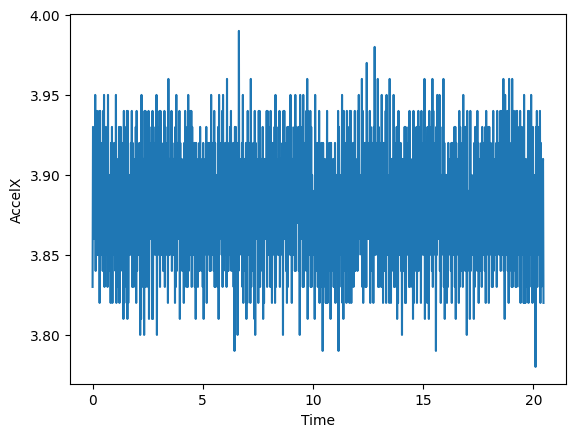

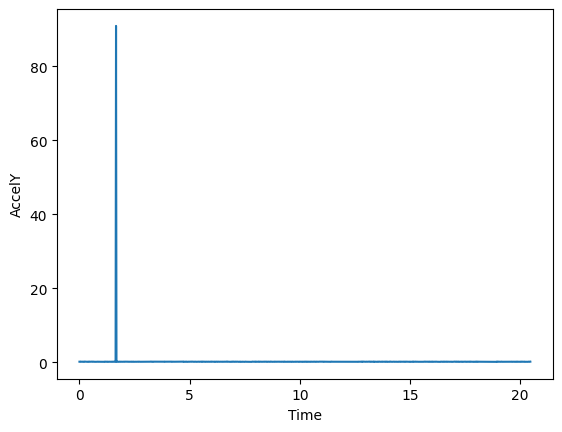

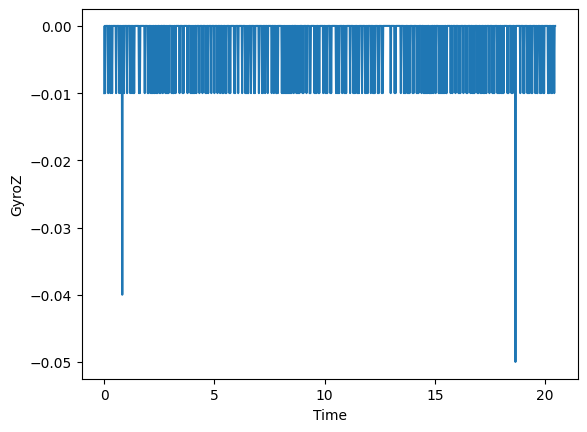

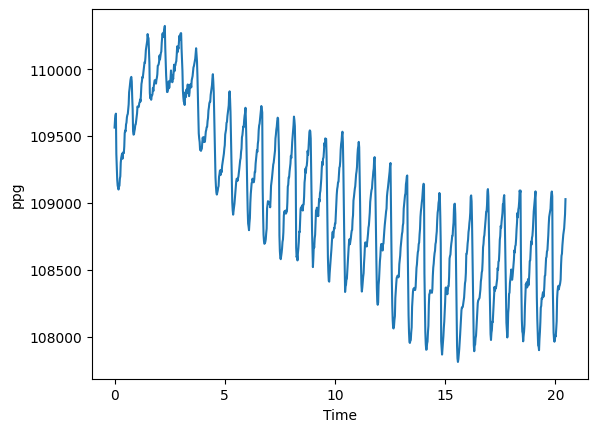

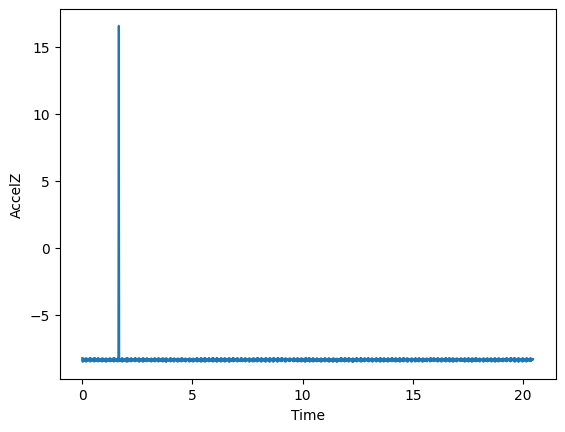

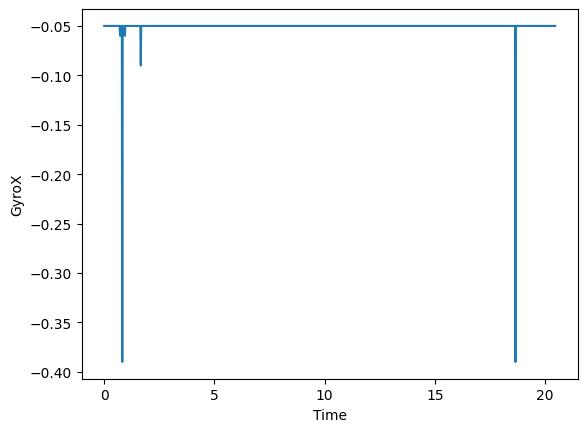

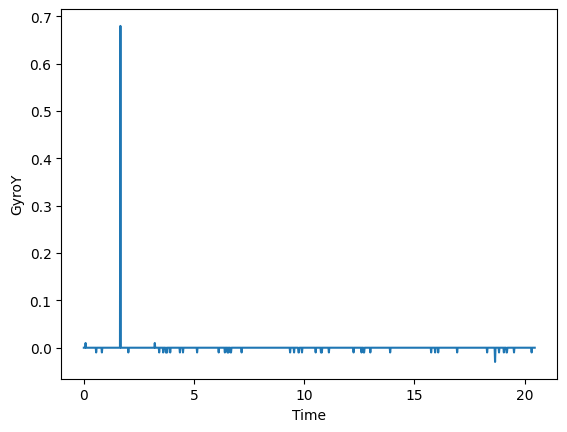

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_csv(path):
    with open(path, "r") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        for row in reader:
            return list(map(float, row.copy()[:len(row)-1]))

fs = 50
x = np.arange(0, 20.48, 1/fs)

for path in sleepStage['SLEEP'][105]:

    signal_type = path.split('/')[-1].split('_')[0]

    Y = read_csv(path)[:1024]

    # Vẽ biểu đồ
    plt.plot(x, Y)

    plt.xlabel('Time')

    if (signal_type == 'accelXSignals'):
        plt.ylabel('AccelX')
    elif (signal_type == 'accelYSignals'):
        plt.ylabel('AccelY')
    elif (signal_type == 'accelZSignals'):
        plt.ylabel('AccelZ')
    elif (signal_type == 'gyroXSignals'):
        plt.ylabel('GyroX')
    elif (signal_type == 'gyroYSignals'):
        plt.ylabel('GyroY')
    elif (signal_type == 'gyroZSignals'):
        plt.ylabel('GyroZ')
    else:
        plt.ylabel('ppg')

    # Hiển thị biểu đồ
    plt.show()

## Tín hiệu trong miền tần số với trạng thái ngủ

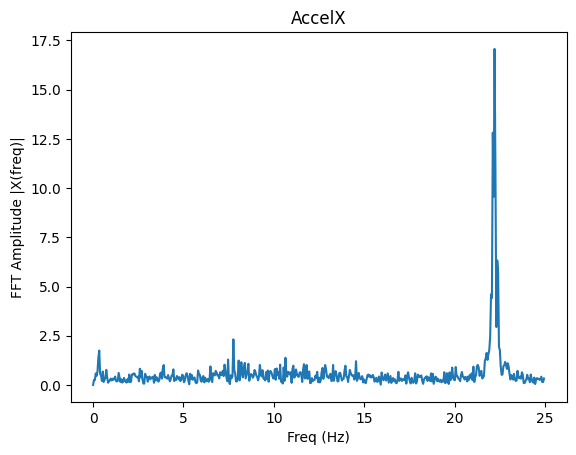

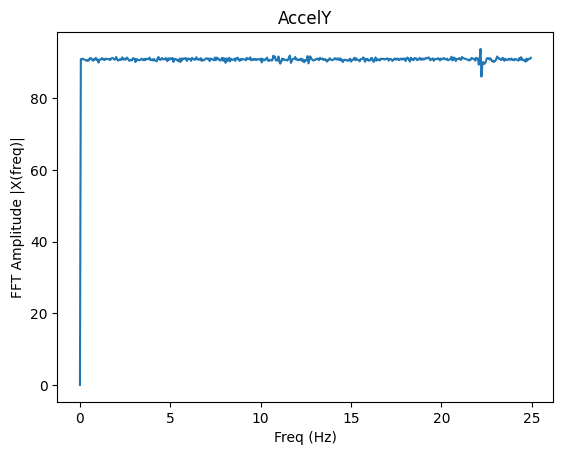

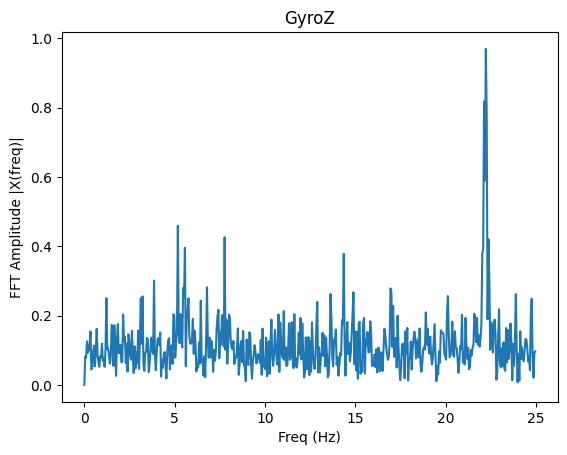

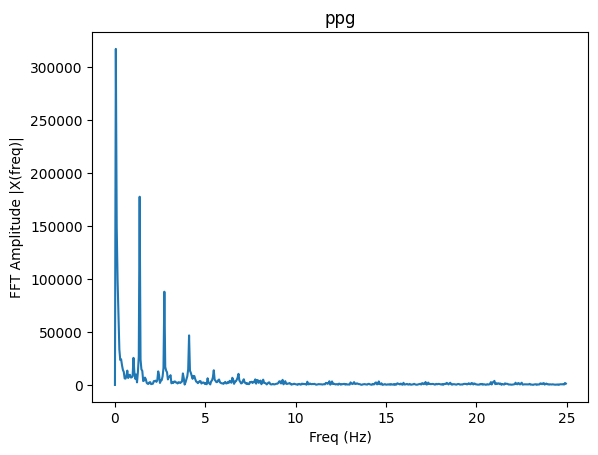

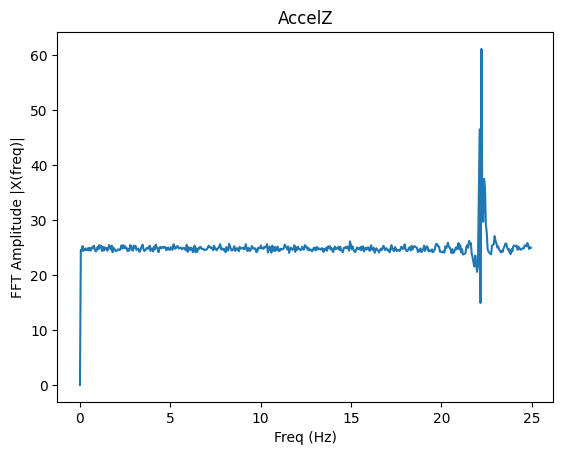

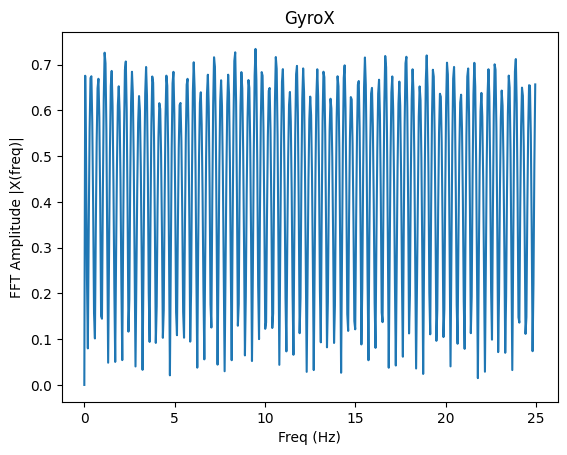

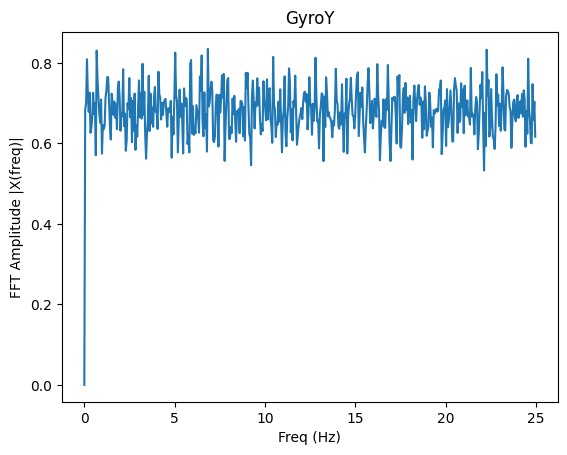

In [4]:
import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def read_csv(path):
    with open(path, "r") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        for row in reader:
            return list(map(float, row.copy()[:len(row)-1]))

def signalScale(data):
    mean = np.mean(data)
    return [val - mean for val in data]

fs = 50
x = np.arange(0, 20.48, 1/fs)
N = len(x)
n = np.arange(N)
freq = n/N*fs

for path in sleepStage['SLEEP'][105]:
    Y = np.abs(np.fft.fft(signalScale(read_csv(path)[:1024])))
    signal_type = path.split('/')[-1].split('_')[0]

    # Vẽ biểu đồ
    plt.plot(freq[:int(len(Y)//2)], Y[:int(len(Y)//2)])

    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')

    if (signal_type == 'accelXSignals'):
        plt.title('AccelX')
    elif (signal_type == 'accelYSignals'):
        plt.title('AccelY')
    elif (signal_type == 'accelZSignals'):
        plt.title('AccelZ')
    elif (signal_type == 'gyroXSignals'):
        plt.title('GyroX')
    elif (signal_type == 'gyroYSignals'):
        plt.title('GyroY')
    elif (signal_type == 'gyroZSignals'):
        plt.title('GyroZ')
    else:
        plt.title('ppg')

    # Hiển thị biểu đồ
    plt.show()

## Tiền xử lý dữ liệu

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from datetime import datetime

def find(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

def signalScale(data):
    mean = np.mean(data)
    return [val - mean for val in data]

fs = 50
x = np.arange(0, 20.48, 1/fs)
N = len(x)
n = np.arange(N)
freq =n/N*fs

data_train = {
    'tAcc-mean()-X': [],
    'tAcc-mean()-Y': [],
    'tAcc-mean()-Z': [],
    'tGyro-mean()-X': [],
    'tGyro-mean()-Y': [],
    'tGyro-mean()-Z': [],
    'tAcc-std()-X': [],
    'tAcc-std()-Y': [],
    'tAcc-std()-Z': [],
    'tGyro-std()-X': [],
    'tGyro-std()-Y': [],
    'tGyro-std()-Z': [],
    'tAcc-min()-X': [],
    'tAcc-min()-Y': [],
    'tAcc-min()-Z': [],
    'tGyro-min()-X': [],
    'tGyro-min()-Y': [],
    'tGyro-min()-Z': [],
    'tAcc-max()-X': [],
    'tAcc-max()-Y': [],
    'tAcc-max()-Z': [],
    'tGyro-max()-X': [],
    'tGyro-max()-Y': [],
    'tGyro-max()-Z': [],
    'ppg-bmp': [],
    'stage': [],
    'label': []
}

labels = {
    'AWAKE': 0,
    'SLEEP': 1
}

for stage in sleepStage:
    for path_arr in sleepStage[stage]:
        for path in path_arr:
            signal_type = path.split('/')[-1].split('_')[0]

            if (signal_type == 'ppgSignal'):
                Y = np.abs(np.fft.fft(signalScale(read_csv(path))[:1024]))
                dominant_freq_index = 14 + np.argmax(Y[14:40])
                dominant_freq = freq[dominant_freq_index]
                data_train['ppg-bmp'].append(round(dominant_freq*60))
            else:
                Y = read_csv(path)[:1024]
                mean = round(np.mean(Y), 8)
                std = round(np.std(Y), 8)
                min = round(np.min(Y), 8)
                max = round(np.max(Y), 8)
                if (signal_type == 'accelXSignals'):
                  data_train['tAcc-mean()-X'].append(mean)
                  data_train['tAcc-std()-X'].append(std)
                  data_train['tAcc-min()-X'].append(min)
                  data_train['tAcc-max()-X'].append(max)
                elif (signal_type == 'accelYSignals'):
                  data_train['tAcc-mean()-Y'].append(mean)
                  data_train['tAcc-std()-Y'].append(std)
                  data_train['tAcc-min()-Y'].append(min)
                  data_train['tAcc-max()-Y'].append(max)
                elif (signal_type == 'accelZSignals'):
                  data_train['tAcc-mean()-Z'].append(mean)
                  data_train['tAcc-std()-Z'].append(std)
                  data_train['tAcc-min()-Z'].append(min)
                  data_train['tAcc-max()-Z'].append(max)
                elif (signal_type == 'gyroXSignals'):
                  data_train['tGyro-mean()-X'].append(mean)
                  data_train['tGyro-std()-X'].append(std)
                  data_train['tGyro-min()-X'].append(min)
                  data_train['tGyro-max()-X'].append(max)
                elif (signal_type == 'gyroYSignals'):
                  data_train['tGyro-mean()-Y'].append(mean)
                  data_train['tGyro-std()-Y'].append(std)
                  data_train['tGyro-min()-Y'].append(min)
                  data_train['tGyro-max()-Y'].append(max)
                else:
                  data_train['tGyro-mean()-Z'].append(mean)
                  data_train['tGyro-std()-Z'].append(std)
                  data_train['tGyro-min()-Z'].append(min)
                  data_train['tGyro-max()-Z'].append(max)


        data_train['stage'].append(stage)
        data_train['label'].append(labels[stage])

df = pd.DataFrame(data_train)
df.to_excel('/content/drive/MyDrive/Colab Notebooks/sleep_stage_data.xlsx', index=False)


## Huấn luyện và đánh giá mô hình

In [20]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [21]:
# Load file dữ liệu
path = "/content/drive/MyDrive/Colab Notebooks/sleep_stage_data.xlsx"
df = pd.read_excel(path)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tAcc-mean()-X   254 non-null    float64
 1   tAcc-mean()-Y   254 non-null    float64
 2   tAcc-mean()-Z   254 non-null    float64
 3   tGyro-mean()-X  254 non-null    float64
 4   tGyro-mean()-Y  254 non-null    float64
 5   tGyro-mean()-Z  254 non-null    float64
 6   tAcc-std()-X    254 non-null    float64
 7   tAcc-std()-Y    254 non-null    float64
 8   tAcc-std()-Z    254 non-null    float64
 9   tGyro-std()-X   254 non-null    float64
 10  tGyro-std()-Y   254 non-null    float64
 11  tGyro-std()-Z   254 non-null    float64
 12  tAcc-min()-X    254 non-null    float64
 13  tAcc-min()-Y    254 non-null    float64
 14  tAcc-min()-Z    254 non-null    float64
 15  tGyro-min()-X   254 non-null    float64
 16  tGyro-min()-Y   254 non-null    float64
 17  tGyro-min()-Z   254 non-null    flo

In [22]:
df_X = df.iloc[:, :-2]
df_y = df.iloc[:, -1]

X = df_X.values
y = df_y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(228, 25)
(228,)
(26, 25)
(26,)


In [23]:
#khởi tạo model và sẽ lựa chọn tham số tối ưu nhất cho model của mình
svc = SVC(kernel='rbf', class_weight='balanced')
param_grid = {'C': [1, 5, 10, 50 , 60],
              'gamma': [0.0001, 0.0005, 0.001, 0.005 ,0.003, 0.002]}
grid = GridSearchCV(svc, param_grid)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [24]:
#dự đoán và đánh giá model
y_fit = model.predict(X_test)

print(model.predict([[0.51,
-2.02,
10.48,
-0.04,
0.03,
0.00,
1.60,
0.72,
0.54,
0.14,
0.14,
0.12,
-1.92,
-4.40,
8.06,
-0.55,
-0.54,
-0.48,
5.88,
-0.53,
11.80,
1.19,
0.91,
1.02,
114.00]]))

#Đánh giá model thông các chỉ số precision, recall, F1-score và support nhé mỗi tham số sẽ biểu thị độ chính xác model ở một khía cạnh khác nhau
labels = ["AWAKE", "SLEEP"]
print(classification_report(y_test, y_fit,target_names=labels))

[0]
              precision    recall  f1-score   support

       AWAKE       0.87      0.87      0.87        15
       SLEEP       0.82      0.82      0.82        11

    accuracy                           0.85        26
   macro avg       0.84      0.84      0.84        26
weighted avg       0.85      0.85      0.85        26



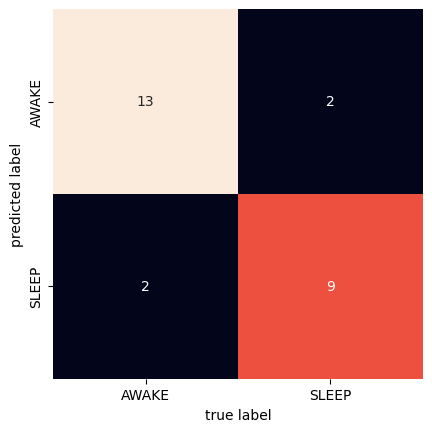

In [25]:
#đánh giá model bằng heat map
mat = confusion_matrix(y_test, y_fit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [26]:
!pip install micromlgen
from micromlgen import port

classMap = {
    0: 'AWAKE',
    1: 'SLEEP'
}

c_code = port(model,classmap=classMap) #convert our model

#Let's write it into a .h file
modelFile = open("/content/drive/MyDrive/Colab Notebooks/sleep_stage_recognition_model.h", "w")
modelFile.write(c_code)
modelFile.close()

#Let's print the size of the .h file
import os
model_h_size = os.path.getsize("/content/drive/MyDrive/Colab Notebooks/sleep_stage_recognition_model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 34,154 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
